# CDS-102: Lab 9 Workbook
## Helena Gray
### March 30, 2017

In [2]:
# Run this code block to load the Tidyverse package
.libPaths(new = "~/Rlibs")
library(tidyverse)
# The dataset is in the file "MDWASHDC_JAN1995_DEC2016.csv"
dc.temps<-read.csv("MDWASHDC_JAN1995_DEC2016.csv")
head(dc.temps)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


month day year t.avg 
 
 1 1 1995 40.6 
 1 2 1995 39.8 
 1 3 1995 29.3 
 1 4 1995 33.0 
 1 5 1995 20.9 
 1 6 1995 27.0

## Lab Task 1##
The code below generates a summary statistics (mean(), median(), min(), max(), and sd()) report of the
average temperature grouped by month using the summarise() function.

In [4]:

by_month<-group_by(dc.temps,month)

temps.table<-summarise(by_month,
 mean=mean(t.avg), max=max(t.avg),min=min(t.avg),med=median(t.avg), sd=sd(t.avg))
temps.table

month mean max min med sd 
 
 1 36.19589 63.1 -99.0 36.10 11.903005 
 2 38.54678 62.8 11.9 38.55 8.666396 
 3 46.83534 76.4 -99.0 46.60 10.634093 
 4 56.95727 79.8 -99.0 56.90 10.009018 
 5 66.27434 85.5 50.2 65.95 7.144027 
 6 74.23167 89.6 -99.0 75.55 14.716578 
 7 79.70176 92.8 65.5 79.80 4.813713 
 8 77.95806 91.0 -99.0 78.20 10.525838 
 9 71.11848 86.1 -99.0 72.10 11.103055 
 10 59.88578 79.5 40.4 59.95 7.446588 
 11 49.30621 70.7 28.2 49.30 7.769721 
 12 40.26364 65.9 -99.0 40.75 13.539830

## Lab Task 2##
The code below plots the Probability Mass Function (PMF) histogram of the average daily temperatures in
the full dataset for each month of the year using the geom_histogram() and ggplot() functions. It uses the
facet_wrap() function to create this as a 12 panel plot.

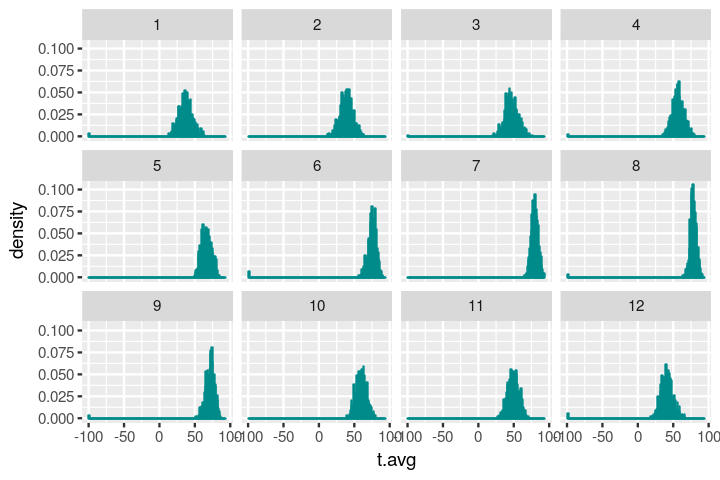

In [10]:
all.months.temps<-ggplot(dc.temps) +
geom_histogram(mapping = aes(x =t.avg, y = ..density..),
binwidth = 1, fill = "cyan3", color = "cyan4") + facet_wrap(~month)

ggsave("all.months.temps.png", plot = all.months.temps, device="png", scale=1, width=5, height=4)
all.months.temps


## Lab Task 3##

The code below creates the normal distribution model for the month of June (all years) using the summary
statistics computed in task 1 by generating the Probability Density Function (PDF). It then stores
the computed values of the model in a new two-column tibble named jun.model.

In [15]:
dc.temps.june<-filter(dc.temps,month==6)

jun.pdf<-dnorm(x = dc.temps.june$t.avg, mean =74.23167, sd = 14.716578)

jun.model<-tibble(temps=dc.temps.june$t.avg,PDF=jun.pdf)




74.2316666666667

14.7165782544198

## Lab Task 4##

The code below creates a new plot containing the average daily temperature PMF histogram and the normal
distribution model for June (all years). Note whether or not the model visually agrees with
the histogram.


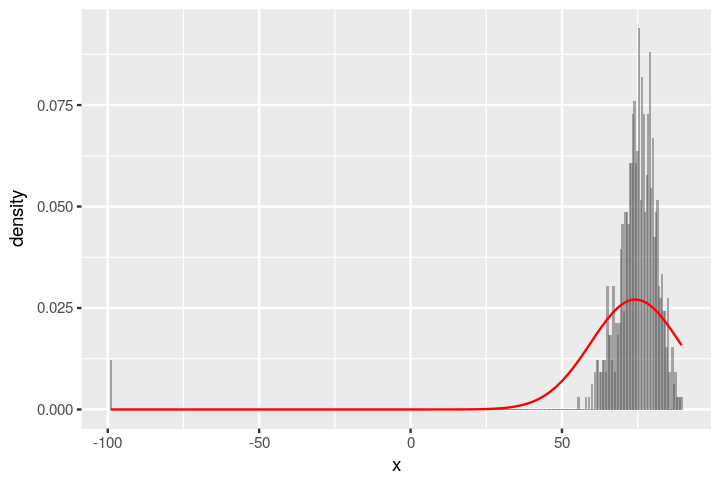

In [23]:
jun.ggplot<-ggplot(data=dc.temps.june)  + geom_histogram(binwidth = .5, mapping = aes(x=t.avg), alpha=.5)

data.ggplot.full <- ggplot_build(jun.ggplot)
data.ggplot.table <- data.ggplot.full$data[[1]]
histogram.table <- tibble(x = data.ggplot.table$x, density = data.ggplot.table$density, frequency = data.ggplot.table$count)

mean.june<-mean(dc.temps.june$t.avg)
sd.june<-sd(dc.temps.june$t.avg)


options(repr.plot.width = 6, repr.plot.height = 4)
data.ggplot.june<-ggplot(data=histogram.table)  + geom_col(mapping = aes(x=x, y=density), alpha=.5) + stat_function(fun=dnorm, args=list(mean=mean.june,sd=sd.june), color= "red")


ggsave("data.ggplot.june.png", plot = data.ggplot.june, device="png", scale=1, width=5, height=4)
data.ggplot.june

## Lab Task 5##
The code below creates a qqplot for the average temperature distribution in June. A theoretical line is
computed and included for comparison.

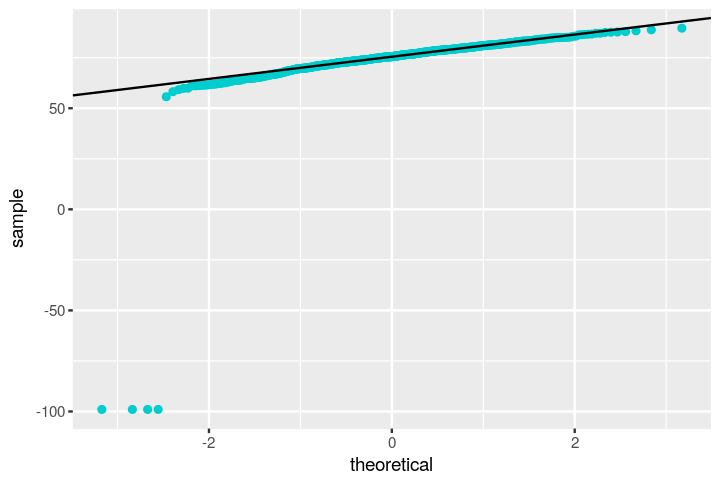

In [21]:
# Find the 1st and 3rd quartiles (0.25 and 0.75 percentiles)
qq_y <- quantile(dc.temps.june$t.avg, c(0.25, 0.75))
# Find the matching normal values on the x-axis
qq_x <- qnorm(c(0.25, 0.75))
# Compute line slope
qq_slope <- diff(qq_y) / diff(qq_x)
# Compute line intercept
qq_int <- qq_y[1] - qq_slope * qq_x[1]


qqplot.june<-ggplot(dc.temps.june) +
geom_qq(aes(sample = t.avg), color = "cyan3") +
geom_abline(intercept = qq_int, slope = qq_slope, color = "black")

ggsave("qqplot.june.png", plot = qqplot.june, device="png", scale=1, width=5, height=4)
qqplot.june

## Lab Task 6##
The code below creates a 12 panel series of qqplots (without theoretical lines) for each month (all years)
using facet_wrap(). Note whether the trend for June applies to the other
months.

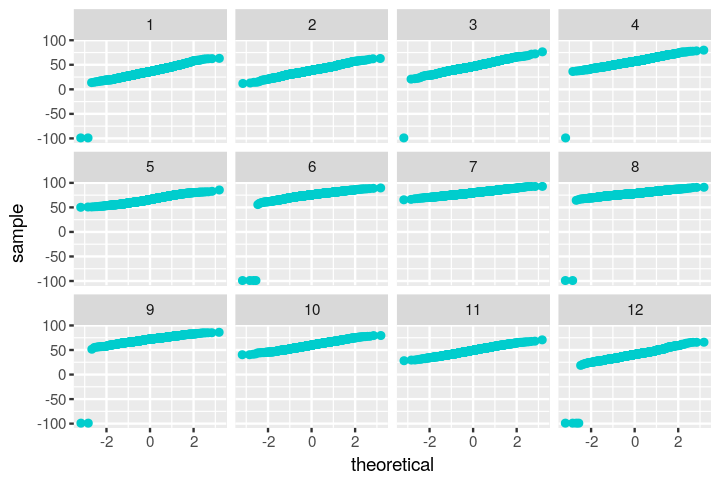

In [22]:
all.months.qqplot<-ggplot(dc.temps) + geom_qq(aes(sample = t.avg), color = "cyan3") + facet_wrap(~month)
ggsave("all.months.qqplot.png",plot = all.months.qqplot, device="png", scale=1, width=5, height=4)
all.months.qqplot

## Lab Task 7##
The normal distribution model is used to compute the temperature of the 0.10 percentile for the
month of June (all years) using the qnorm() function.

In [18]:
# The top 90% of temperatures are the temperatures in the 10th percentile or higher

june.mean =74.23167
june.sd = 14.716578
june.p10 <- qnorm(p = 0.10, mean = june.mean, sd = june.sd)
june.p10

55.3716164246408

## Lab Task 8##
The normal distribution model is used to compute the percentile of the temperature 83◦F for the
month of June (all years) using the pnorm() function.

In [24]:
pnorm(q = 83, mean = june.mean, sd = june.sd)

0.72434995525201

## Key Questions##

For the month of June, what is the probability that any given day will have a temperature
of 83◦F or higher? The code below uses the pnorm() function to find this probability.

How cold are the coldest 10% of days? The qnorm() function is used to find this average temperature of the 10% coldest days.

In [26]:
pnorm(83, mean=june.mean, sd=june.sd, lower.tail=FALSE)
qnorm(0.1, mean=june.mean, sd=june.sd)


0.27565004474799

55.3716164246408

Report the mean for the month of March with a 68% and a 95% confidence interval.

In [27]:
ci.95<- 2* june.sd

cat("The 95% confidence interval for the unfiltered dataset is ", june.mean, "+-",ci.95,"\n")
cat("The 68% confidence interval for the unfiltered dataset is ", june.mean, "+-",june.sd)

june.mean+ci.95
june.mean-ci.95

june.mean+june.sd
june.mean-june.sd

The 95% confidence interval for the unfiltered dataset is  74.23167 +- 29.43316 
The 68% confidence interval for the unfiltered dataset is  74.23167 +- 14.71658

103.664826

44.798514

88.948248

59.515092